In [1]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('3170_21y.csv')

# Find the maximum value in the 'VALUE' column
max_value = df['VALUE'].max()

# Print the maximum value
print("Maximum value in the 'VALUE' column:", max_value)


Maximum value in the 'VALUE' column: 161.6


In [199]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('3170_21y.csv')

# Find the row index with the maximum value in the 'VALUE' column
max_index = df['VALUE'].idxmax()

# Extract the maximum value and corresponding date
max_value = df.loc[max_index, 'VALUE']
max_date = df.loc[max_index, 'DATE']

# Print the maximum value and corresponding date
print("Maximum value in the 'VALUE' column:", max_value)
print("Date corresponding to the maximum value:", max_date)


Maximum value in the 'VALUE' column: 161.6
Date corresponding to the maximum value: 2020-03-25


In [193]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('3170_21y.csv')

# Find the minimum value in the 'VALUE' column while excluding zero
non_zero_values = df[df['VALUE'] != 0]  # Filter out zero values
min_value = non_zero_values['VALUE'].min()

# Print the minimum value
print("Minimum value in the 'VALUE' column (excluding zero):", min_value)


Minimum value in the 'VALUE' column (excluding zero): 0.2


In [ ]:
START

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('3170.csv')

# Ensure that the 'DATE' column is datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Filter rows between 2002 and 2022
mask = (df['DATE'] >= '1961-03-03') & (df['DATE'] <= '2001-12-31')
df = df.loc[mask]

# Filter rows with values above 10
#df_above_10 = df[(df['VALUE'] >0)& (df['VALUE'] <=50)]
df_above_10 = df[(df['VALUE'] >0)]


# Save the filtered data to a new CSV file
df_above_10.to_csv('CT_past.csv', index=False)


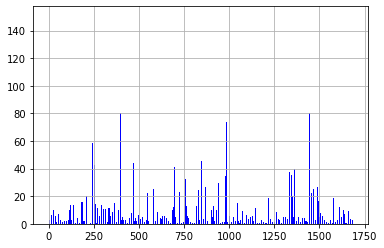

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the INTER.csv file
df = pd.read_csv('CT_pastpast.csv')

# Reverse the order of the DataFrame rows and reset the index
#df_reverted = df.iloc[::-1].reset_index(drop=True)

# Save the reverted x-axis to a new CSV file named "INTEREV.csv"
#df_reverted.to_csv('CT_above_10REV.csv', index=False)

# Plotting the data
#plt.figure(figsize=(12, 7))

plt.bar(df.index, df['VALUE'], color='b', label='Interevent times', width=0.6)

#plt.title('Interevent Time across Time (2002)')
#plt.xlabel('Index (Reversed Order)')
#plt.ylabel('Interevent Time (days)')
#plt.legend(loc='best')

plt.grid(True)
plt.show()

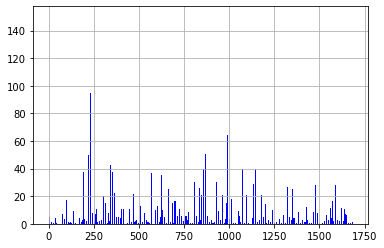

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the INTER.csv file
#df = pd.read_csv('CT_above_90.csv')
df = pd.read_csv('CT_pastpast.csv')

# Reverse the order of the DataFrame rows and reset the index
df_reverted = df.iloc[::-1].reset_index(drop=True)

# Save the reverted x-axis to a new CSV file named "INTEREV.csv"
df_reverted.to_csv('CT_pastpastREV.csv', index=False)

# Plotting the data
#plt.figure(figsize=(12, 7))

plt.bar(df_reverted.index, df_reverted['VALUE'], color='b', label='Interevent times', width=0.6)

#plt.title('Interevent Time across Time (2002)')
#plt.xlabel('Index (Reversed Order)')
#plt.ylabel('Interevent Time (days)')
#plt.legend(loc='best')

plt.grid(True)
plt.show()

In [128]:
import pandas as pd

# Load the data from INTER.csv and INTEREV.csv files
df_inter = pd.read_csv('CT_pastpast.csv')
df_interev = pd.read_csv('CT_pastpastREV.csv')

# Calculate the symmetrical sum and store it in a new DataFrame 'sym'
sym = pd.DataFrame()
sym['DATE'] = df_inter['DATE']
sym['SUM'] = (df_inter['VALUE'] + df_interev['VALUE']) / 2

# Print the 'sym' DataFrame
print(sym)

# Store the 'sym' DataFrame in a new CSV file named "SYMMETRIC.csv"
sym.to_csv('CTSYMMETRIC_pastpast.csv', index=False)


            DATE   SUM
0     1921-01-21  2.50
1     1921-02-01  3.00
2     1921-02-03  2.10
3     1921-02-06  4.65
4     1921-02-10  1.40
...          ...   ...
1681  1961-01-29  1.40
1682  1961-01-30  4.65
1683  1961-01-31  2.10
1684  1961-02-10  3.00
1685  1961-03-02  2.50

[1686 rows x 2 columns]


In [129]:
import pandas as pd

# Load the data from INTER.csv and INTEREV.csv files
df_inter = pd.read_csv('CT_pastpast.csv')
df_interev = pd.read_csv('CT_pastpastREV.csv')

# Calculate the symmetrical sum and store it in a new DataFrame 'sym'
sym = pd.DataFrame()
sym['DATE'] = df_inter['DATE']
sym['SUM'] = (df_inter['VALUE'] - df_interev['VALUE']) / 2

# Print the 'sym' DataFrame
print(sym)

# Store the 'sym' DataFrame in a new CSV file named "SYMMETRIC.csv"
sym.to_csv('CTANTISYMMETRIC_pastpast.csv', index=False)


            DATE   SUM
0     1921-01-21  0.10
1     1921-02-01  1.00
2     1921-02-03 -0.90
3     1921-02-06 -4.15
4     1921-02-10 -1.00
...          ...   ...
1681  1961-01-29  1.00
1682  1961-01-30  4.15
1683  1961-01-31  0.90
1684  1961-02-10 -1.00
1685  1961-03-02 -0.10

[1686 rows x 2 columns]


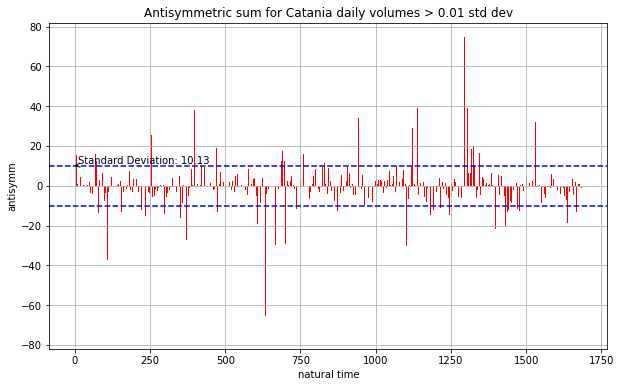

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the ANTISYMMETRIC.csv file
df = pd.read_csv('CTANTISYMMETRIC_pastpast.csv')

# Plotting the data
plt.figure(figsize=(10, 6))

plt.bar(df.index, df['SUM'], color='r', label='Interevent times', width=0.6)

# Compute the standard deviation
std_dev = df['SUM'].std()

# Plot the standard deviation as horizontal lines
plt.axhline(std_dev, color='b', linestyle='--', label='Standard Deviation')
plt.axhline(-std_dev, color='b', linestyle='--')

# Annotate the standard deviation value on the plot
plt.annotate(f'Standard Deviation: {std_dev:.2f}', xy=(0, std_dev), xytext=(10, std_dev + 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

#plt.annotate(f'Standard Deviation: {-std_dev:.2f}', xy=(0, -std_dev), xytext=(10, -std_dev - 2),
             #arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('Antisymmetric sum for Catania daily volumes > 0.01 std dev')
plt.xlabel('natural time')
plt.ylabel('antisymm')
#plt.ylim(-35, 35)
#plt.legend(loc='best')  # Show the legend with labels
plt.grid(True)
#plt.savefig('CTANTISYMMETRIC_above_0v.jpg', dpi=300)
plt.show()

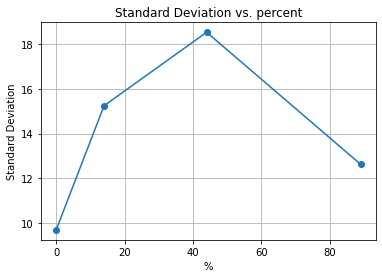

In [58]:
import matplotlib.pyplot as plt

# Given data
std_deviation_values = [9.69, 15.25, 18.54, 12.63]
numbers = [0, 14, 44, 89]

# Create the plot
plt.plot(numbers, std_deviation_values, marker='o', linestyle='-')
plt.xlabel('%')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation vs. percent')
#plt.xlim(0, 101)
#plt.ylim(0,20)
plt.grid(True)
#plt.savefig('CTstddevantisymmversuspercentsoglie.jpg', dpi=300)

plt.show()

In [8]:
print(std_dev)

9.686898368414944


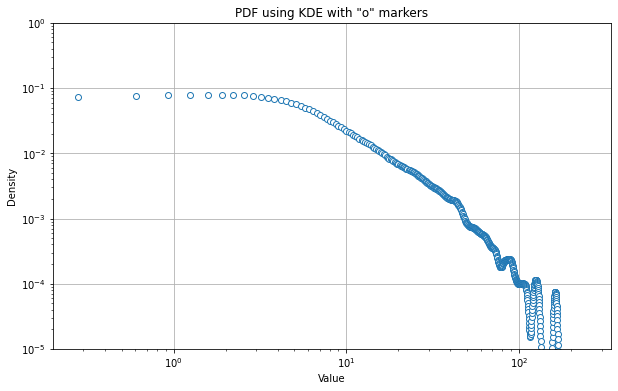

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CT_above_0.csv', parse_dates=['DATE'])

# Create a KDE plot with "o" markers
plt.figure(figsize=(10, 6))
df['VALUE'].plot(kind='kde', style='o', markerfacecolor='white')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.00001,1)
plt.title('PDF using KDE with "o" markers')
plt.grid(True)
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('3170_21y.csv', parse_dates=['DATE'])

# Create a KDE plot using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='VALUE', fill=True, log_scale=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('PDF using KDE with Seaborn')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


C:\Users\verap\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\verap\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


ValueError: Data has no positive values, and therefore can not be log-scaled.

C:\Users\verap\AppData\Local\Temp\ipykernel_4804\2580814969.py:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,150)


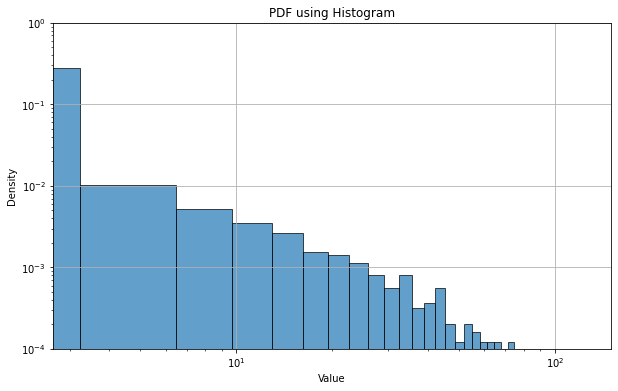

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('3170_21y.csv', parse_dates=['DATE'])

# Create a histogram for the PDF
plt.figure(figsize=(10, 6))
plt.hist(df['VALUE'], bins=50, density=True, log=True, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('PDF using Histogram')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001,1)
plt.xlim(0,150)
plt.grid(True)
plt.show()


C:\Users\verap\AppData\Local\Temp\ipykernel_4804\302395504.py:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,150)


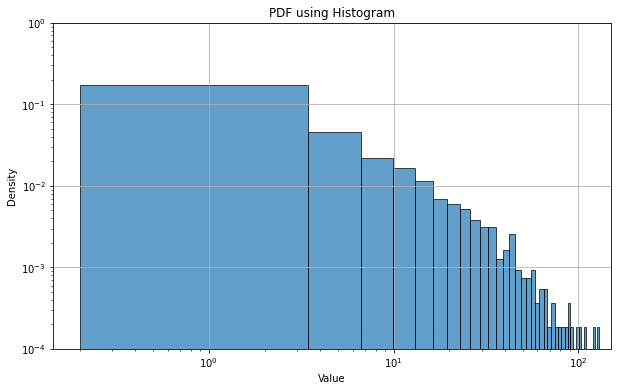

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CT_above_00.csv', parse_dates=['DATE'])

# Create a histogram for the PDF
plt.figure(figsize=(10, 6))
plt.hist(df['VALUE'], bins=50, density=True, log=True, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('PDF using Histogram')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.ylim(0.0001,1)
plt.xlim(0,150)
plt.show()


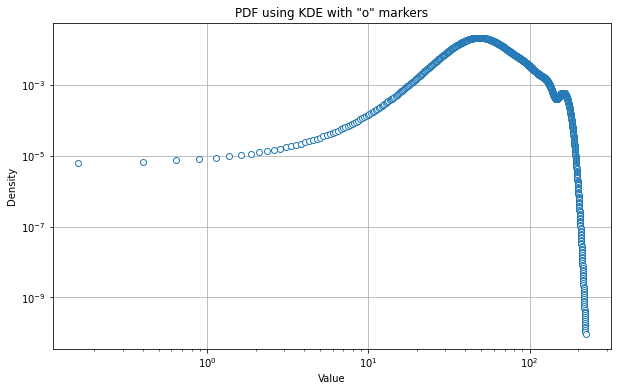

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CT_above_40.csv', parse_dates=['DATE'])

# Create a KDE plot with "o" markers
plt.figure(figsize=(10, 6))
df['VALUE'].plot(kind='kde', style='o', markerfacecolor='white')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.0001,1)
plt.title('PDF using KDE with "o" markers')
plt.grid(True)
plt.show()


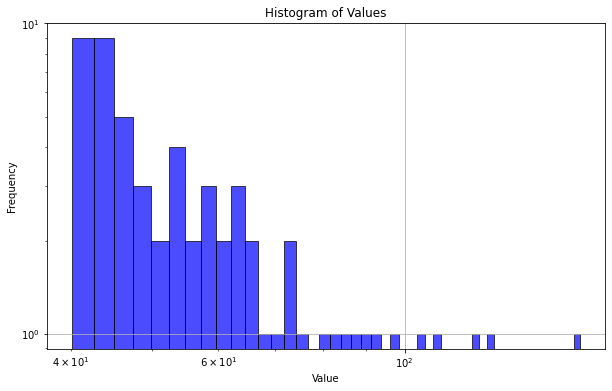

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CT_above_40.csv', parse_dates=['DATE'])

# Create a histogram plot
plt.figure(figsize=(10, 6))
plt.hist(df['VALUE'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.title('Histogram of Values')
plt.grid(True)
plt.show()


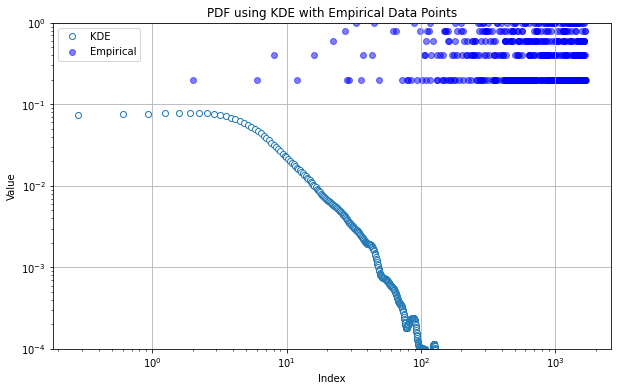

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('CT_above_0.csv', parse_dates=['DATE'])

# Create a KDE plot with "o" markers
plt.figure(figsize=(10, 6))

# KDE plot
df['VALUE'].plot(kind='kde', style='o', markerfacecolor='white', label='KDE')

# Scatter plot for the original data points
plt.scatter(df.index, df['VALUE'], color='blue', alpha=0.5, label='Empirical')

plt.xlabel('Index')
plt.ylabel('Value')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001,1)
plt.title('PDF using KDE with Empirical Data Points')
plt.grid(True)
plt.legend()
plt.show()


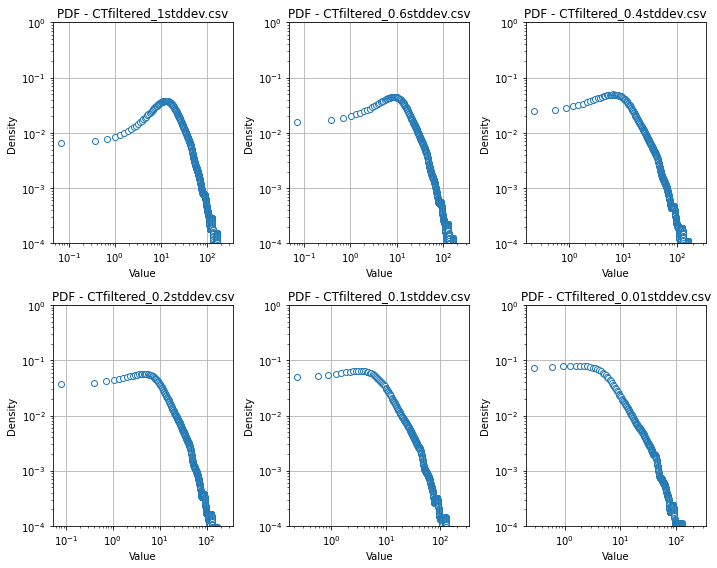

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file names
csv_files = [
    'CTfiltered_1stddev.csv',
    'CTfiltered_0.6stddev.csv',
    'CTfiltered_0.4stddev.csv',
    'CTfiltered_0.2stddev.csv',
    'CTfiltered_0.1stddev.csv',
    'CTfiltered_0.01stddev.csv'
]

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Loop over the CSV files and plot the KDE plots in the grid
for i, csv_file in enumerate(csv_files):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file, parse_dates=['DATE'])

    # Get the current subplot axes
    ax = axes[i // 3, i % 3]

    # Create a KDE plot with "o" markers for the current DataFrame
    df['VALUE'].plot(kind='kde', style='o', markerfacecolor='white', ax=ax)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(0.0001, 1)
    ax.set_title(f'PDF - {csv_file}')
    ax.grid(True)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PDF with a filename for the grid of KDE plots
plt.savefig('KDE_grid_3x2.pdf')

# Show the grid of KDE plots
plt.show()


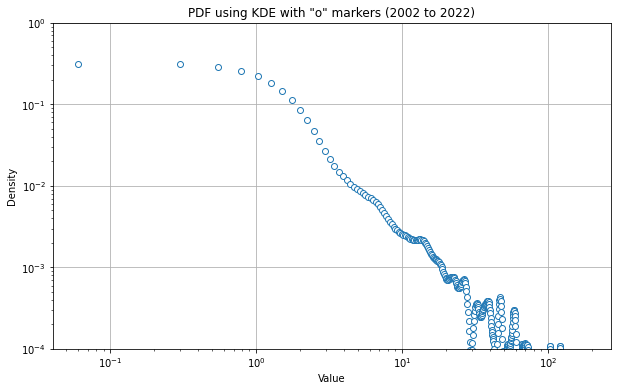

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('3170.csv', parse_dates=['DATE'])

# Filter data from 2002 to 2022
start_date = pd.to_datetime('1960-01-01')
end_date = pd.to_datetime('1968-12-31')
df = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]

# Create a KDE plot with "o" markers
plt.figure(figsize=(10, 6))
df['VALUE'].plot(kind='kde', style='o', markerfacecolor='white')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001, 1)
plt.title('PDF using KDE with "o" markers (2002 to 2022)')
plt.grid(True)
plt.show()


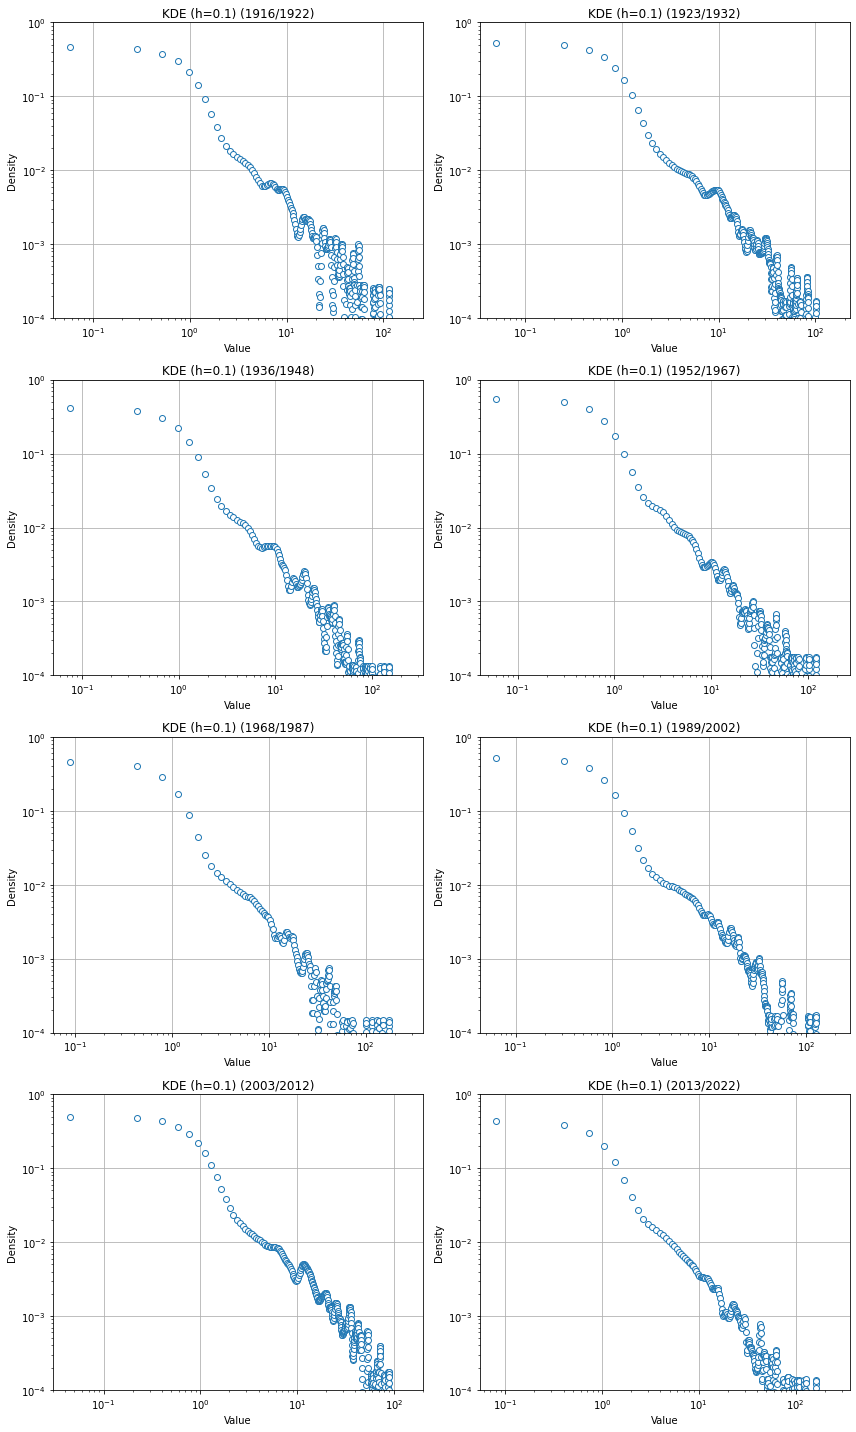

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('3170.csv', parse_dates=['DATE'])

# Define the time intervals
intervals = [
    (pd.to_datetime('1916-01-01'), pd.to_datetime('1922-12-31')),
    (pd.to_datetime('1923-01-01'), pd.to_datetime('1932-12-31')),
    (pd.to_datetime('1936-01-01'), pd.to_datetime('1948-12-31')),
    (pd.to_datetime('1952-01-01'), pd.to_datetime('1967-12-31')),
    (pd.to_datetime('1968-01-01'), pd.to_datetime('1987-12-31')),
    (pd.to_datetime('1989-01-01'), pd.to_datetime('2002-12-31')),
    (pd.to_datetime('2003-01-01'), pd.to_datetime('2012-12-31')),
    (pd.to_datetime('2013-01-01'), pd.to_datetime('2022-12-31'))
]

# Create a 4x2 grid of subplots to accommodate all 8 intervals
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

# Plot the KDE for each time interval in the corresponding subplot
for i, (start_date, end_date) in enumerate(intervals):
    row, col = i // 2, i % 2
    df_interval = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    
    # Plot KDE with customizable bandwidth (h)
    h = 0.1  # Adjust the bandwidth value as needed
    df_interval['VALUE'].plot(kind='kde', style='o', markerfacecolor='white', ax=axes[row, col], bw_method=h)
    
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Density')
    axes[row, col].set_xscale('log')
    axes[row, col].set_yscale('log')
    axes[row, col].set_ylim(0.0001, 1)
    axes[row, col].set_title(f'KDE (h={h}) ({start_date.year}/{end_date.year})')
    axes[row, col].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


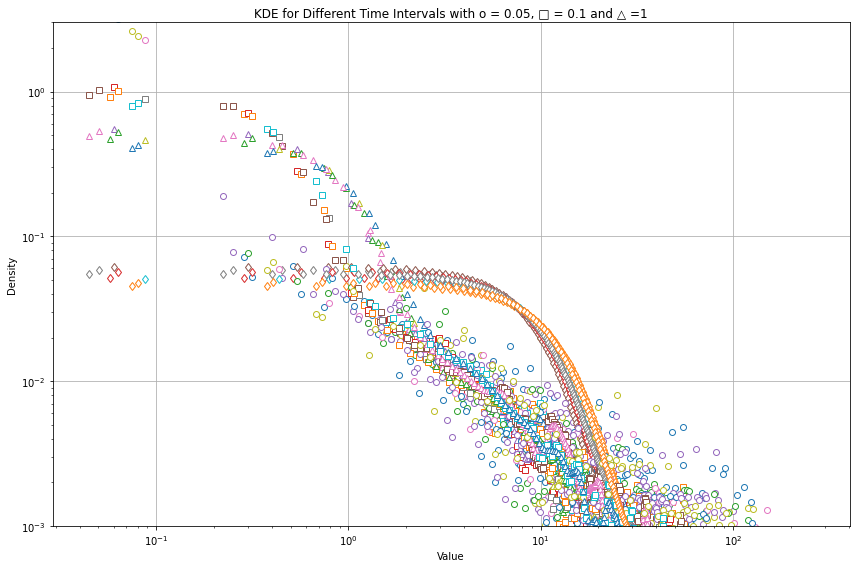

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('3170.csv', parse_dates=['DATE'])

# Define the time intervals
intervals = [
    (pd.to_datetime('1916-01-01'), pd.to_datetime('1922-12-31')),
    (pd.to_datetime('1923-01-01'), pd.to_datetime('1932-12-31')),
    (pd.to_datetime('1936-01-01'), pd.to_datetime('1948-12-31')),
    (pd.to_datetime('1952-01-01'), pd.to_datetime('1967-12-31')),
    (pd.to_datetime('1968-01-01'), pd.to_datetime('1987-12-31')),
    (pd.to_datetime('1989-01-01'), pd.to_datetime('2002-12-31')),
    (pd.to_datetime('2003-01-01'), pd.to_datetime('2012-12-31')),
    (pd.to_datetime('2013-01-01'), pd.to_datetime('2022-12-31'))
]

# Create a single plot for all KDEs
plt.figure(figsize=(12, 8))

# Different bandwidth values to try
bandwidths = [.01, .05, .1, 1]

# Define a list of markers to use for each bandwidth
markers = ['o', 's', '^', 'd']

# Plot the KDE for each time interval with different bandwidths and markers
for i, (start_date, end_date) in enumerate(intervals):
    df_interval = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    
    for h, marker in zip(bandwidths, markers):
        df_interval['VALUE'].plot(kind='kde', style=marker, markerfacecolor='white', label=f'{start_date.year}-{end_date.year} (h={h})', bw_method=h)

        # Create a custom legend for the bandwidth markers
legend_labels = [f'Bandwidth: {h}' for h in bandwidths]
handles = [plt.Line2D([0], [0], marker=marker, color='w', label=label, markersize=10) for marker, label in zip(markers, legend_labels)]

# Show the custom legend
#plt.legend(handles=handles, loc='upper right')

plt.xlabel('Value')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.001, 3)
plt.title('KDE for Different Time Intervals with o = 0.05, □ = 0.1 and △ =1')
#plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


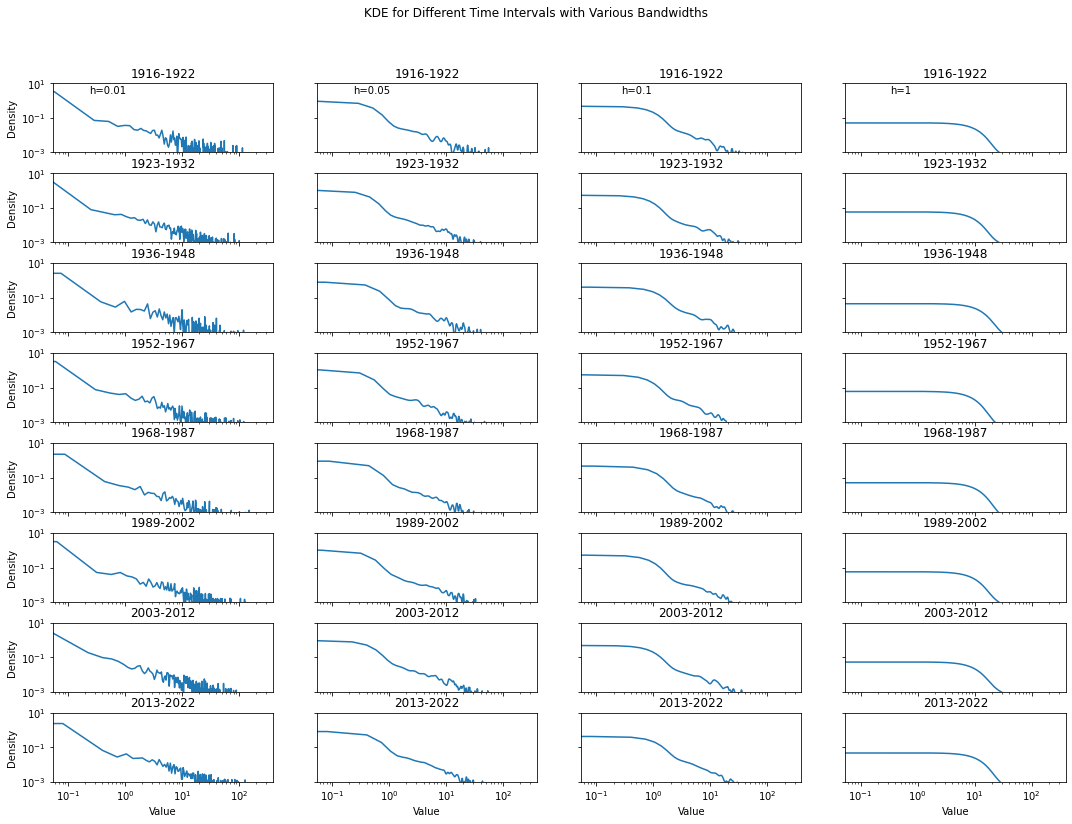

In [274]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('3170.csv', parse_dates=['DATE'])

# Define the time intervals
intervals = [
    (pd.to_datetime('1916-01-01'), pd.to_datetime('1922-12-31')),
    (pd.to_datetime('1923-01-01'), pd.to_datetime('1932-12-31')),
    (pd.to_datetime('1936-01-01'), pd.to_datetime('1948-12-31')),
    (pd.to_datetime('1952-01-01'), pd.to_datetime('1967-12-31')),
    (pd.to_datetime('1968-01-01'), pd.to_datetime('1987-12-31')),
    (pd.to_datetime('1989-01-01'), pd.to_datetime('2002-12-31')),
    (pd.to_datetime('2003-01-01'), pd.to_datetime('2012-12-31')),
    (pd.to_datetime('2013-01-01'), pd.to_datetime('2022-12-31'))
]

# Different bandwidth values to try
bandwidths = [.01, .05, .1, 1]

# Create a grid of subplots
num_rows = len(intervals)
num_cols = len(bandwidths)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12), sharex=True, sharey=True)

# Plot the KDE for each time interval with different bandwidths and markers
for i, (start_date, end_date) in enumerate(intervals):
    df_interval = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    
    for j, h in enumerate(bandwidths):
        ax = axes[i, j]
        df_interval['VALUE'].plot(kind='kde', style='-', label=f'h={h}', bw_method=h, ax=ax)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylim(0.001, 10)
        ax.set_title(f'{start_date.year}-{end_date.year}')
        
        if i == num_rows - 1:
            ax.set_xlabel('Value')
        if j == 0:
            ax.set_ylabel('Density')
        
        # Display the bandwidth value above each column
        if i == 0:
            ax.annotate(f'h={h}', xy=(0.5, 1), xytext=(0, 5), textcoords='offset points',
                        ha='center', va='bottom', fontsize=10)

# Add a common legend for all plots
#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right', title='Bandwidth')

plt.suptitle('KDE for Different Time Intervals with Various Bandwidths')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.savefig('CTdecades.jpg', dpi=300)

plt.show()


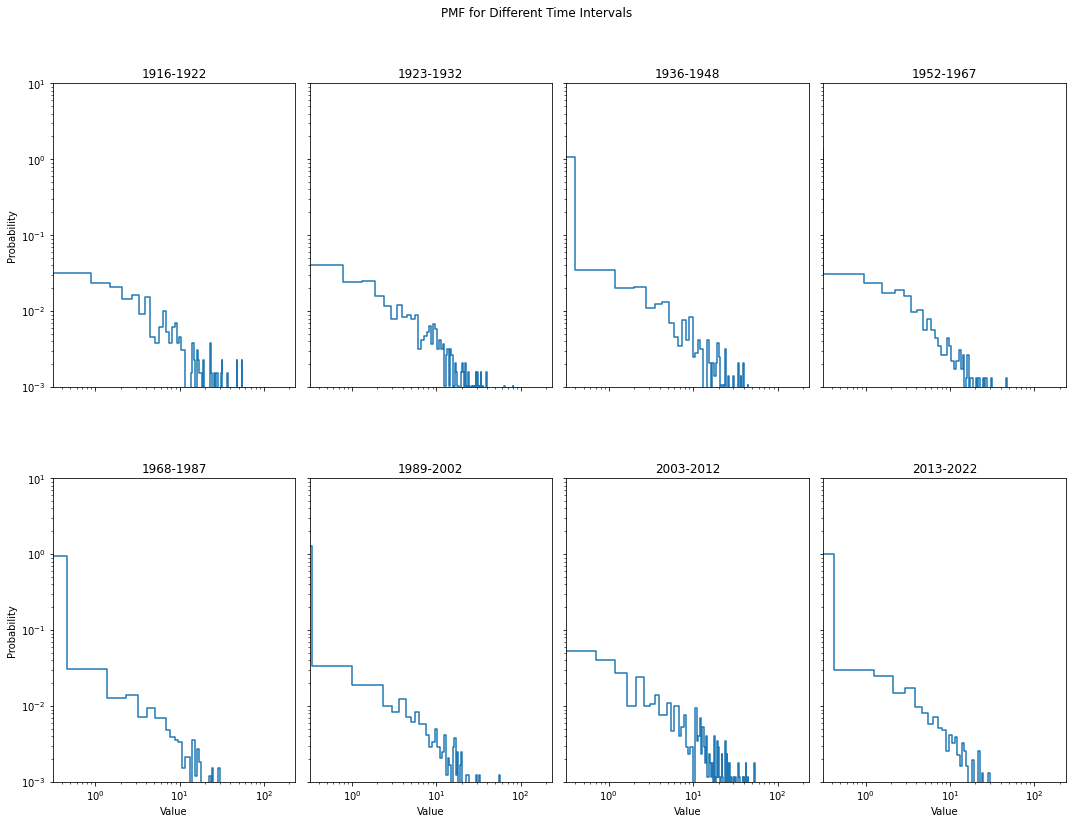

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
# The file name and column names might be different in your actual data.
df = pd.read_csv('3170.csv', parse_dates=['DATE'])

# Define the time intervals
intervals = [
    (pd.to_datetime('1916-01-01'), pd.to_datetime('1922-12-31')),
    (pd.to_datetime('1923-01-01'), pd.to_datetime('1932-12-31')),
    (pd.to_datetime('1936-01-01'), pd.to_datetime('1948-12-31')),
    (pd.to_datetime('1952-01-01'), pd.to_datetime('1967-12-31')),
    (pd.to_datetime('1968-01-01'), pd.to_datetime('1987-12-31')),
    (pd.to_datetime('1989-01-01'), pd.to_datetime('2002-12-31')),
    (pd.to_datetime('2003-01-01'), pd.to_datetime('2012-12-31')),
    (pd.to_datetime('2013-01-01'), pd.to_datetime('2022-12-31'))
]

# Number of bins for histogram
num_bins = 191

# Create a grid of subplots
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12), sharex=True, sharey=True)

# Plot the PMF for each time interval
for i, (start_date, end_date) in enumerate(intervals):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    df_interval = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    
    # Calculate the PMF
    counts, bin_edges = np.histogram(df_interval['VALUE'], bins=num_bins, density=True)
    
    # Plot the PMF
    ax.step(bin_edges[:-1], counts, where='mid')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(0.001, 10)
    #ax.set_xlim(0,150)
    ax.set_title(f'{start_date.year}-{end_date.year}')
    
    if row == num_rows - 1:
        ax.set_xlabel('Value')
    if col == 0:
        ax.set_ylabel('Probability')

plt.suptitle('PMF for Different Time Intervals')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(hspace=0.3)
#plt.savefig('CTdecades_PMF.jpg', dpi=300)

plt.show()


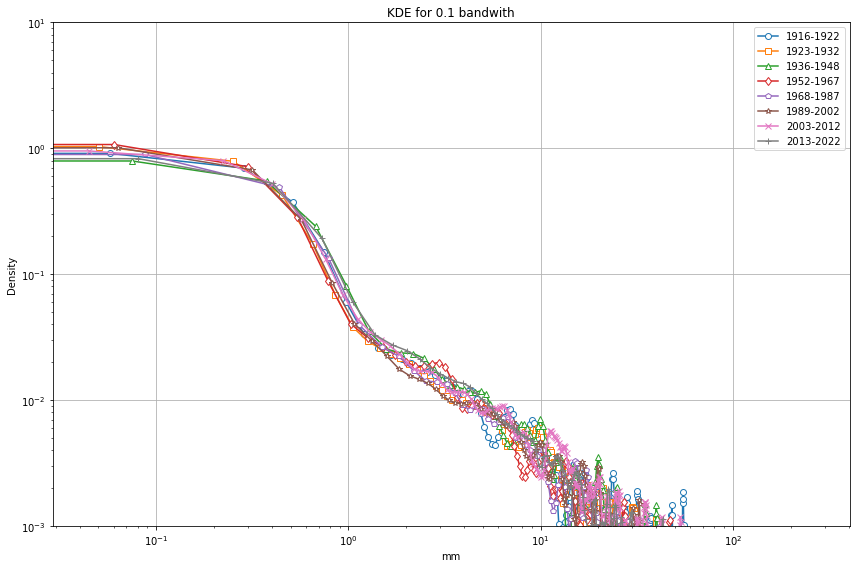

In [301]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('3170.csv', parse_dates=['DATE'])

# Define the time intervals
intervals = [
    (pd.to_datetime('1916-01-01'), pd.to_datetime('1922-12-31')),
    (pd.to_datetime('1923-01-01'), pd.to_datetime('1932-12-31')),
    (pd.to_datetime('1936-01-01'), pd.to_datetime('1948-12-31')),
    (pd.to_datetime('1952-01-01'), pd.to_datetime('1967-12-31')),
    (pd.to_datetime('1968-01-01'), pd.to_datetime('1987-12-31')),
    (pd.to_datetime('1989-01-01'), pd.to_datetime('2002-12-31')),
    (pd.to_datetime('2003-01-01'), pd.to_datetime('2012-12-31')),
    (pd.to_datetime('2013-01-01'), pd.to_datetime('2022-12-31'))
]

# Create a single plot for all KDEs
plt.figure(figsize=(12, 8))

# Define markers for each decade
markers = ['o', 's', '^', 'd', 'p', '*', 'x', '+']

# Define a single bandwidth for all intervals
bandwidth = 0.05

# Plot the KDE for each time interval
for i, (start_date, end_date) in enumerate(intervals):
    df_interval = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    
    df_interval['VALUE'].plot(kind='kde',linestyle='-', style=markers[i], markerfacecolor='white', label=f'{start_date.year}-{end_date.year}', bw_method=bandwidth)

plt.xlabel('mm')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.001, 10)
#plt.xlim(0.01,10)
plt.title('KDE for 0.1 bandwith')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
#plt.savefig('CTdecadesss.jpg', dpi=300)

plt.show()


<Figure size 864x576 with 0 Axes>

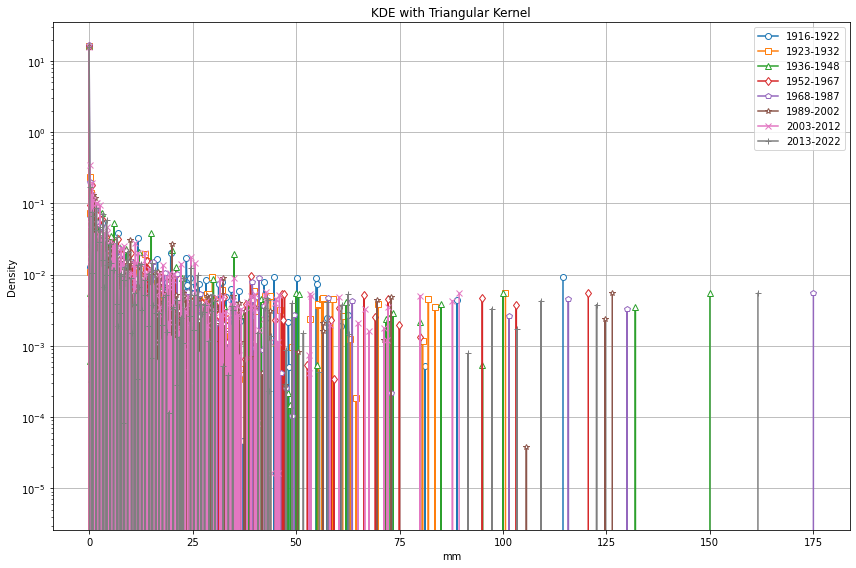

In [317]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('3170.csv', parse_dates=['DATE'])

# Define the time intervals
intervals = [
    (pd.to_datetime('1916-01-01'), pd.to_datetime('1922-12-31')),
    (pd.to_datetime('1923-01-01'), pd.to_datetime('1932-12-31')),
    (pd.to_datetime('1936-01-01'), pd.to_datetime('1948-12-31')),
    (pd.to_datetime('1952-01-01'), pd.to_datetime('1967-12-31')),
    (pd.to_datetime('1968-01-01'), pd.to_datetime('1987-12-31')),
    (pd.to_datetime('1989-01-01'), pd.to_datetime('2002-12-31')),
    (pd.to_datetime('2003-01-01'), pd.to_datetime('2012-12-31')),
    (pd.to_datetime('2013-01-01'), pd.to_datetime('2022-12-31'))
]

# Create a single plot for all KDEs
plt.figure(figsize=(12, 8))

# Define markers for each decade
markers = ['o', 's', '^', 'd', 'p', '*', 'x', '+']

# Define a single bandwidth for all intervals
bandwidth = 0.05


def triangular(u):
    return np.where(np.abs(u) <= 1, 1 - np.abs(u), 0)


plt.figure(figsize=(12, 8))

for i, (start_date, end_date) in enumerate(intervals):
    df_interval = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    values = df_interval['VALUE'].values
    
    # KDE computation
    u = np.linspace(min(values), max(values), 1000)
    kde = np.sum([triangular((u - v) / bandwidth) for v in values], axis=0) / (len(values) * bandwidth)
    
    # Plot the KDE
    plt.plot(u, kde, marker=markers[i], markerfacecolor='white', label=f'{start_date.year}-{end_date.year}')

plt.xlabel('mm')
plt.ylabel('Density')
#plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.001, 10)
plt.title('KDE with Triangular Kernel')
plt.legend()
plt.grid(True)

plt.tight_layout()
#plt.savefig('CTdecadesss.jpg', dpi=300)
plt.show()


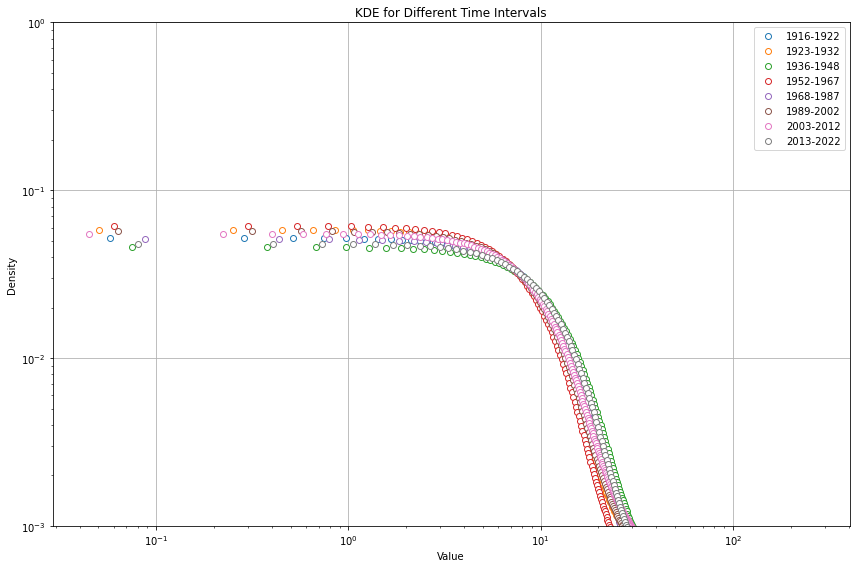

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('3170.csv', parse_dates=['DATE'])

# Define the time intervals
intervals = [
    (pd.to_datetime('1916-01-01'), pd.to_datetime('1922-12-31')),
    (pd.to_datetime('1923-01-01'), pd.to_datetime('1932-12-31')),
    (pd.to_datetime('1936-01-01'), pd.to_datetime('1948-12-31')),
    (pd.to_datetime('1952-01-01'), pd.to_datetime('1967-12-31')),
    (pd.to_datetime('1968-01-01'), pd.to_datetime('1987-12-31')),
    (pd.to_datetime('1989-01-01'), pd.to_datetime('2002-12-31')),
    (pd.to_datetime('2003-01-01'), pd.to_datetime('2012-12-31')),
    (pd.to_datetime('2013-01-01'), pd.to_datetime('2022-12-31'))
]

# Create a single plot for all KDEs
plt.figure(figsize=(12, 8))

# Plot the KDE for each time interval
for i, (start_date, end_date) in enumerate(intervals):
    df_interval = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    
    # Plot KDE with customizable bandwidth (h)
    h = 1  # Adjust the bandwidth value as needed
    df_interval['VALUE'].plot(kind='kde', style='o', markerfacecolor='white', label=f'{start_date.year}-{end_date.year}', bw_method=h)

plt.xlabel('Value')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.001, 1)
plt.title('KDE for Different Time Intervals')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


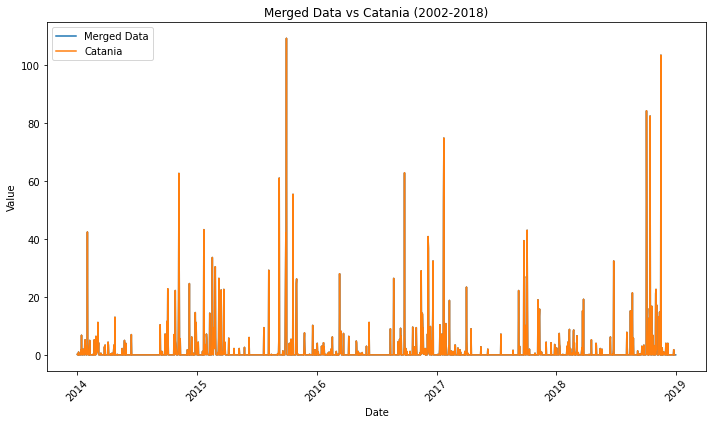

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
mergeddata = pd.read_csv('merged_data.csv', parse_dates=['DATE'])
catania = pd.read_csv('Catania.csv', parse_dates=['DATE'])

# Filter data for the years 2002 to 2018
start_date = pd.Timestamp('2014-01-01')
end_date = pd.Timestamp('2018-12-31')
filtered_mergeddata = mergeddata[(mergeddata['DATE'] >= start_date) & (mergeddata['DATE'] <= end_date)]
filtered_catania = catania[(catania['DATE'] >= start_date) & (catania['DATE'] <= end_date)]

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_mergeddata['DATE'], filtered_mergeddata['VALUE'], label='Merged Data')
plt.plot(filtered_catania['DATE'], filtered_catania['VALUE'], label='Catania')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Merged Data vs Catania (2002-2018)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


ValueError: x and y must have same first dimension, but have shapes (6209,) and (12418,)

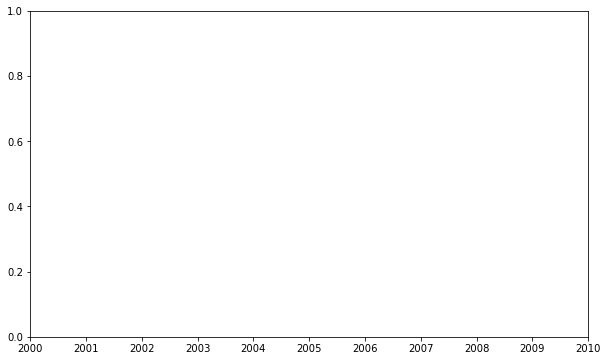

In [254]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
mergeddata = pd.read_csv('merged_data.csv', parse_dates=['DATE'])
catania = pd.read_csv('Catania.csv', parse_dates=['DATE'])

# Filter data for the years 2002 to 2018
start_date = pd.Timestamp('2002-01-01')
end_date = pd.Timestamp('2018-12-31')
filtered_mergeddata = mergeddata[(mergeddata['DATE'] >= start_date) & (mergeddata['DATE'] <= end_date)]
filtered_catania = catania[(catania['DATE'] >= start_date) & (catania['DATE'] <= end_date)]

# Check if the lengths are the same
if len(filtered_mergeddata) != len(filtered_catania):
    raise ValueError("Filtered datasets have different lengths!")

# Calculate the differences between corresponding values
differences = filtered_mergeddata['VALUE'] - filtered_catania['VALUE']

# Create a plot for the differences
plt.figure(figsize=(10, 6))
plt.plot(filtered_mergeddata['DATE'], differences, label='Differences')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Differences between Merged Data and Catania (2002-2018)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


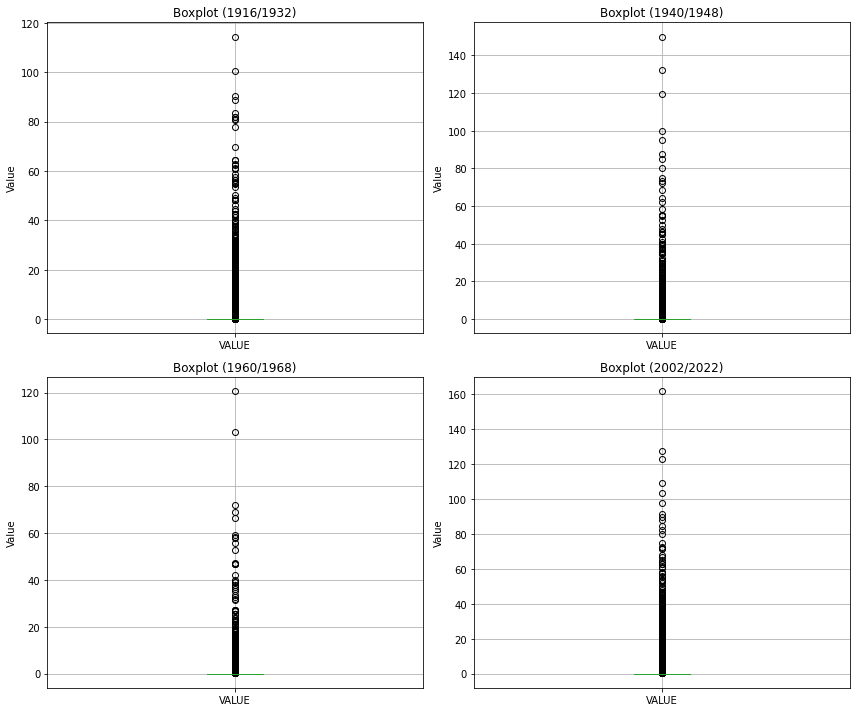

In [76]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot boxplots for each time interval in the corresponding subplot
for i, (start_date, end_date) in enumerate(intervals):
    row, col = i // 2, i % 2
    df_interval = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    df_interval.boxplot(column='VALUE', ax=axes[row, col])
    axes[row, col].set_ylabel('Value')
    axes[row, col].set_title(f'Boxplot ({start_date.year}/{end_date.year})')
    axes[row, col].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


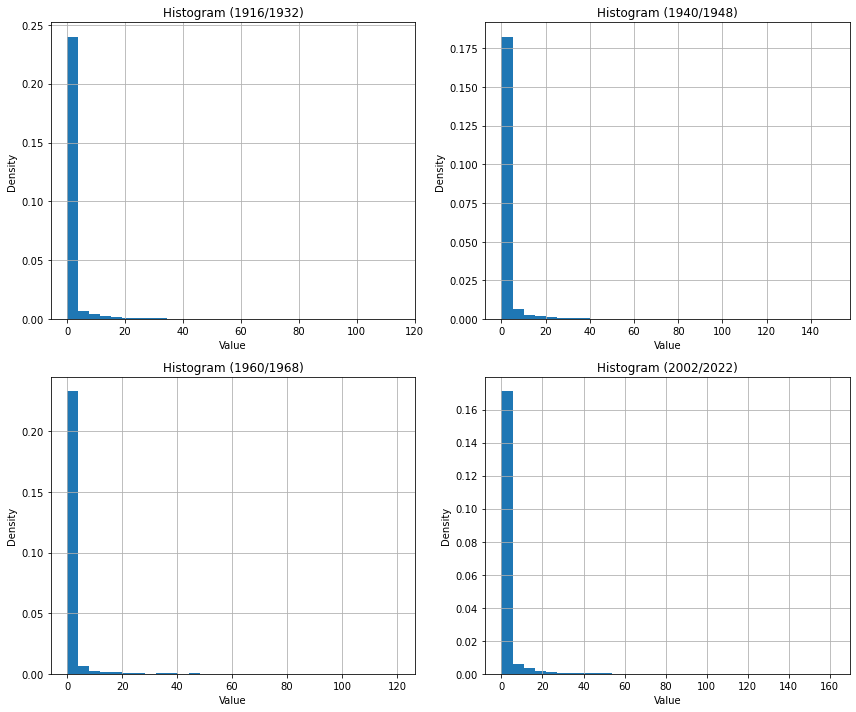

In [77]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for each time interval in the corresponding subplot
for i, (start_date, end_date) in enumerate(intervals):
    row, col = i // 2, i % 2
    df_interval = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    axes[row, col].hist(df_interval['VALUE'], bins=30, density=True)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Density')
    axes[row, col].set_title(f'Histogram ({start_date.year}/{end_date.year})')
    axes[row, col].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


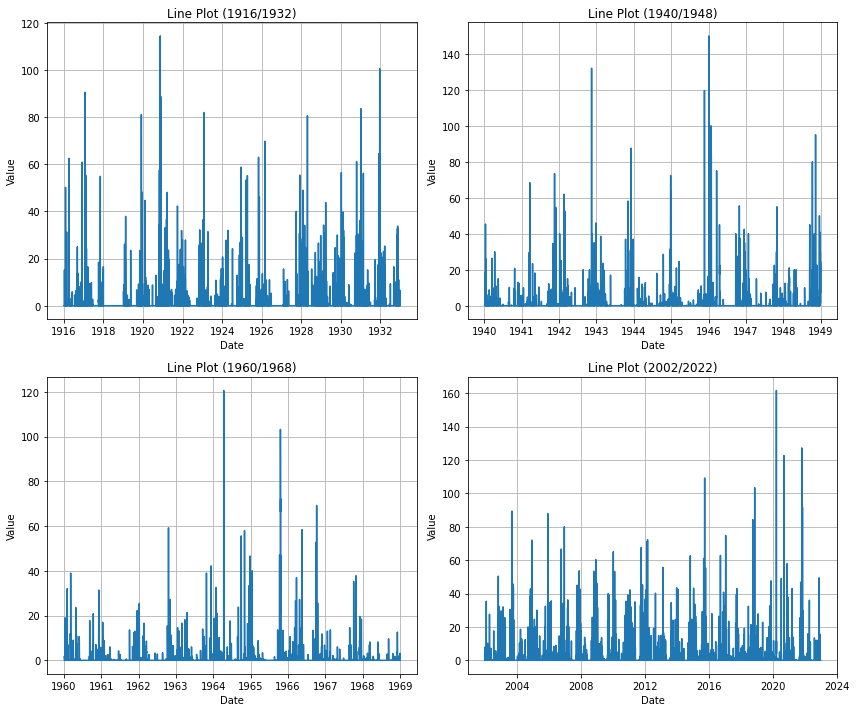

In [78]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot line plots for each time interval in the corresponding subplot
for i, (start_date, end_date) in enumerate(intervals):
    row, col = i // 2, i % 2
    df_interval = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    axes[row, col].plot(df_interval['DATE'], df_interval['VALUE'])
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Value')
    axes[row, col].set_title(f'Line Plot ({start_date.year}/{end_date.year})')
    axes[row, col].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
